In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.41 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("/content/drive/MyDrive/Home2/runs/detect/train4/weights/best.pt")

In [5]:
results = model('/content/drive/MyDrive/Home2/datasets/test/1000.jpg')


image 1/1 /content/drive/MyDrive/Home2/datasets/test/1000.jpg: 448x640 1 LicensePlate, 654.3ms
Speed: 24.3ms preprocess, 654.3ms inference, 28.4ms postprocess per image at shape (1, 3, 448, 640)


In [9]:
print(type(results))

<class 'list'>


In [11]:
# prompt: print dimensions of a list named results. the list seems to be 4 dimensional

import numpy as np

# Assuming 'results' is defined as in your previous code
# and holds the output of the YOLO model.

# Access the boxes attribute of the first result
boxes = results[0].boxes

# Get the number of detected objects
num_boxes = len(boxes)

if num_boxes > 0:
  # Check if xyxy is available (this field might not always be there)
  try:
    xyxy = boxes.xyxy.cpu().numpy()  # Move to CPU and convert to numpy array
    print("Dimensions of xyxy:", xyxy.shape)
  except AttributeError:
    print("xyxy attribute not found in results.boxes")

  # Check for other attributes like xywh or xyxy, etc.
  try:
    xywh = boxes.xywh.cpu().numpy()  # Example of another attribute
    print("Dimensions of xywh:", xywh.shape)
  except AttributeError:
    print("xywh attribute not found in results.boxes")

  # Print the general number of boxes detected
  print(f"Number of boxes detected: {num_boxes}")

else:
  print("No boxes detected in the image.")

Dimensions of xyxy: (1, 4)
Dimensions of xywh: (1, 4)
Number of boxes detected: 1


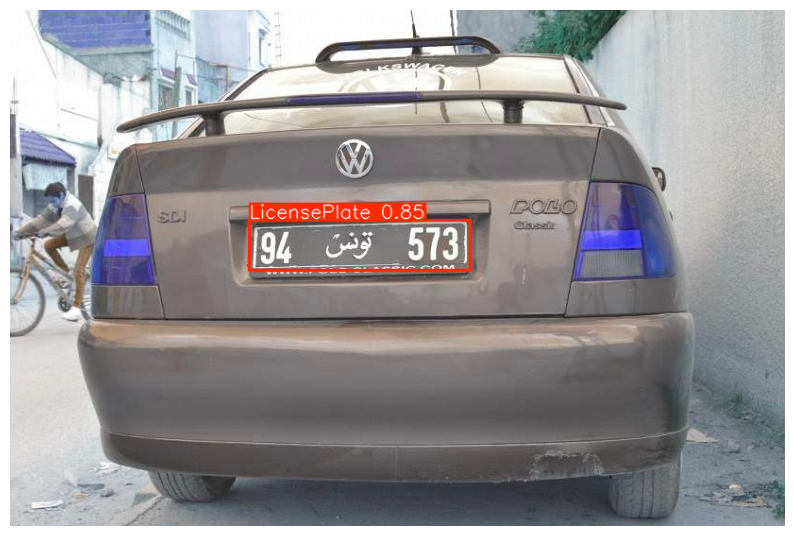

In [12]:
# prompt: Show the image.

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming 'results' is defined as in your previous code
# and holds the output of the YOLO model.

# Access the image from the results
image = results[0].plot()

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

Dimensions of xyxy: (1, 4)
Dimensions of xywh: (1, 4)
Number of boxes detected: 1


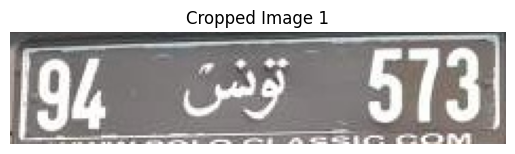

In [14]:
# prompt: extract the image within the box and show

# Access the boxes attribute of the first result
boxes = results[0].boxes

# Get the number of detected objects
num_boxes = len(boxes)

if num_boxes > 0:
  try:
      xyxy = boxes.xyxy.cpu().numpy()
      print("Dimensions of xyxy:", xyxy.shape)
  except AttributeError:
      print("xyxy attribute not found in results.boxes")

  try:
      xywh = boxes.xywh.cpu().numpy()
      print("Dimensions of xywh:", xywh.shape)
  except AttributeError:
      print("xywh attribute not found in results.boxes")

  print(f"Number of boxes detected: {num_boxes}")

  # Access the original image
  img = results[0].orig_img

  # Iterate through each detected box
  for i in range(num_boxes):
    x1, y1, x2, y2 = map(int, xyxy[i]) # Convert coordinates to integers

    # Extract the image within the bounding box
    cropped_image = img[y1:y2, x1:x2]

    # Display the cropped image
    plt.figure()
    plt.imshow(cropped_image)
    plt.title(f"Cropped Image {i+1}")
    plt.axis('off')
    plt.show()
else:
  print("No boxes detected in the image.")

In [ ]:
# prompt: All imports have been made. Code to use the model on all the images in a folder and save the cropped images in a folder called cropped images at the link I will provide.

import ultralytics
from ultralytics import YOLO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2

# Install ultralytics if not already installed
try:
    import ultralytics
except ImportError:
    print("Installing ultralytics...")
    !pip install ultralytics
    import ultralytics

ultralytics.checks()

# Load the model
model = YOLO("/content/drive/MyDrive/Home2/runs/detect/train4/weights/best.pt")

# Define input and output folders
image_folder = '/content/drive/MyDrive/Home2/datasets/test'  # Replace with your image folder path
output_folder = '/content/drive/MyDrive/Home2/cropped_images'  # Replace with your desired output path

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
        image_path = os.path.join(image_folder, filename)
        results = model(image_path)

        # Process the results for the current image
        try:
            boxes = results[0].boxes
            xyxy = boxes.xyxy.cpu().numpy()
            img = results[0].orig_img

            for i in range(len(boxes)):
                x1, y1, x2, y2 = map(int, xyxy[i])
                cropped_image = img[y1:y2, x1:x2]

                # Save the cropped image
                output_filename = os.path.join(output_folder, f"img_{filename[:-4]}.jpg") # Save with original name
                cv2.imwrite(output_filename, cropped_image)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

In [17]:
import os
import cv2

# Load the model
model = YOLO("/content/drive/MyDrive/Home2/runs/detect/train4/weights/best.pt")

# Define input and output folders
image_folder = '/content/drive/MyDrive/Home2/datasets/test'  # Replace with your image folder path
output_folder = '/content/drive/MyDrive/Home2/datasets/cropped_images'  # Replace with your desired output path

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
        image_path = os.path.join(image_folder, filename)
        results = model(image_path)

        # Process the results for the current image
        try:
            boxes = results[0].boxes
            xyxy = boxes.xyxy.cpu().numpy()
            img = results[0].orig_img

            for i in range(len(boxes)):
                x1, y1, x2, y2 = map(int, xyxy[i])
                cropped_image = img[y1:y2, x1:x2]

                # Save the cropped image
                output_filename = os.path.join(output_folder, f"{filename[:-4]}_cropped_{i}.jpg") # Save with original name + cropped_i
                cv2.imwrite(output_filename, cropped_image)

        except Exception as e:
            print(f"Error processing {filename}: {e}")


image 1/1 /content/drive/MyDrive/Home2/datasets/test/1112.jpg: 640x480 1 LicensePlate, 713.1ms
Speed: 18.8ms preprocess, 713.1ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Home2/datasets/test/985.jpg: 640x480 1 LicensePlate, 1520.1ms
Speed: 16.1ms preprocess, 1520.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Home2/datasets/test/927.jpg: 640x480 1 LicensePlate, 1444.3ms
Speed: 12.1ms preprocess, 1444.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Home2/datasets/test/1066.jpg: 640x544 1 LicensePlate, 1853.7ms
Speed: 11.3ms preprocess, 1853.7ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/Home2/datasets/test/1063.jpg: 640x480 1 LicensePlate, 1150.3ms
Speed: 11.0ms preprocess, 1150.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /conte